Use CNNs to classify fashion items in the Fashion-MNIST dataset.

Load and preprocess the Fashion-MNIST dataset.Build a CNN model using Keras/TensorFlow.Train the model on the training set and evaluate it on the test set.Tune hyperparameters such as learning rate, batch size, and epochs.Visualize the feature maps from different layers of the CNN.

Fashion MNIST Classification with CNN
Introduction

Fashion MNIST is a popular dataset consisting of 70,000 grayscale images of clothing items in 10 different categories. Each image is 28x28 pixels, making it a compact and manageable dataset for deep learning beginners and experts alike. In this notebook, we'll explore the Fashion MNIST dataset and build a Convolutional Neural Network (CNN) using TensorFlow's Keras API to classify the images.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

git clone git@github.com:zalandoresearch/fashion-mnist.git

Labels

Each training and test example is assigned to one of the following labels:
Label 	Description
0 	T-shirt/top
1 	Trouser
2 	Pullover
3 	Dress
4 	Coat
5 	Sandal
6 	Shirt
7 	Sneaker
8 	Bag
9 	Ankle boot

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import layers,models


In [243]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [244]:


# Create the dataset object
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load train and test sets as tuples
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [245]:
(train_images.shape,test_images.shape),(train_labels.shape,test_labels.shape)

(((60000, 28, 28), (10000, 28, 28)), ((60000,), (10000,)))

## train set contains 60000 images, test set contains 10000 images
## size of each image =(28,28)

In [246]:
train_images[0].shape

(28, 28)

In [247]:
train_labels[:2]

array([9, 0], dtype=uint8)

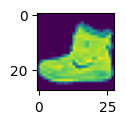

In [248]:
plt.figure(figsize=(2,1))
plt.imshow(train_images[0])

In [249]:
train_labels #it is already single dimension array, so no need to convert

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [250]:
label_desc={
0:"T-shirt/top",
1:"Trouser",
2:"Pullover",
3:"Dress",
4:"Coat",
5:"Sandal",
6:"Shirt",
7:"Sneaker",
8:"Bag",
9:"Ankle boot"}

In [251]:
# Reshape images to (num_samples, 28, 28, 1) for CNNs
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [252]:
train_images[0].shape

(28, 28, 1)

## X or train_image values are not standardized 

In [253]:
train_images=train_images/255
test_images=test_images/255

In [254]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## CNN= convolution+ReLu+Pooling+DNN

In [255]:
mnist_cnn=models.Sequential([
    # layers.Flatten(input_shape=train_images[0].shape),
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(train_images[0].shape)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),

    #DNN
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(50,activation="relu"),
    layers.Dense(10,activation="softmax"),
])

In [256]:
# import keras.optimizers.Adam
# adam=Adam()
mnist_cnn.compile(
    optimizer='adam',#(learning_rate=0.001)',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [257]:
mnist_cnn.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_39 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,476 (720.61 KB)

 Trainable params: 184,476 (720.61 KB)

 Non-trainable params: 0 (0.00 B)

In [258]:
mnist_cnn.fit(train_images,train_labels,epochs=5,batch_size=100)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7197 - loss: 0.7907
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8654 - loss: 0.3765
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.8877 - loss: 0.3094
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8982 - loss: 0.2762
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9080 - loss: 0.2455


In [259]:
with open("mnist_cnn.pkl","wb") as f:
    pickle.dump(mnist_cnn,f)

with open("mnist_cnn.pkl","rb") as f:
    model_cnn_mnist_pkl=pickle.load(f)   

In [260]:
model_cnn_mnist_pkl.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9005 - loss: 0.2780


[0.27541258931159973, 0.8996999859809875]